<a href="https://colab.research.google.com/github/nicnicolex/BINA_NL/blob/main/bina_ln_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reinitialized existing Git repository in /content/.git/
[main 62c87d8] first commit
 1 file changed, 1 insertion(+)
error: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import os

# Load the Excel file
file_path = 'https://github.com/nicnicolex/BINA_NL/raw/main/Schweizerische_Zivilluftfahrtstatistik_Passagiere_2005-2022.xlsx'
xls = pd.ExcelFile(file_path)

# Define the list of valid values
continent = ['Europa / Europe', 'Afrika / Afrique', 'Asien / Asie',
             'Ozeanien / Océanie', 'Nordamerika / Amérique du nord',
             'Zentralamerika / Amérique centrale', 'Südamerika / Amérique du Sud']
valid_values = ['Total'] + continent

flights_df = pd.DataFrame()

# Extract each sheet, clean it, and save to separate CSV files
for sheet in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet)
    df.columns.values[0] = 'country'
    df.rename(columns={'Unnamed: 1': 'total'}, inplace=True)
    df['year'] = sheet
    # Filter rows to keep only those with specific values in 'country' or rows with NaN in 'country'
    columns_to_keep = ['year', 'country', 'total']
    df = df[columns_to_keep]
    # Keep rows where 'country' starts with 'Jahr'
    df = df[~df['country'].astype(str).str.startswith('Jahr')]
    # Filter out rows where 'country' is not a string
    df = df[df['country'].apply(lambda x: isinstance(x, str))]

    df = df.dropna()

    index = 0
    last_continent = continent[index]
    def get_continent(country, current_index):
        if current_index < len(continent) - 1 and country == continent[current_index + 1]:
            current_index += 1
        return continent[current_index], current_index

    continents = []
    for country in df['country']:
        last_continent, index = get_continent(country, index)
        continents.append(last_continent)

    df['continent'] = continents

     # Convert 'total' column to numeric, coercing errors to NaN and then filling them with 0
     # Ensure 'total' is treated as a string, then convert to numeric
    df['total'] = pd.to_numeric(df['total'].astype(str).str.replace(',', ''), errors='coerce').fillna(0)



    # Save the filtered dataframe to a CSV file
    csv_file_name = f"{sheet}.csv"

    # Check if the file exists and remove it
    if os.path.exists(csv_file_name):
        os.remove(csv_file_name)

    df.to_csv(csv_file_name, index=False)
    flights_df = pd.concat([df, flights_df], ignore_index=True)

# Sort the combined DataFrame by the 'year' column
flights_df = flights_df.sort_values(by='year')

# Save the combined and sorted DataFrame to a CSV file
combined_csv_file_name = "combined_data.csv"
flights_df.to_csv(combined_csv_file_name, index=False)

# List files in the current directory and display the content of combined_data.csv
print(os.listdir('.'))
with open(combined_csv_file_name, 'r') as file:
    print(file.read())


['.config', '2015.csv', '2013.csv', '2020.csv', '2008.csv', '2009.csv', '2016.csv', '2021.csv', '2011.csv', '2022.csv', '2007.csv', '2019.csv', 'combined_passenger_data.csv', '2010.csv', 'README.md', '2006.csv', '2017.csv', '2005.csv', '.git', 'combined_data.csv', '2014.csv', '2018.csv', '2012.csv', 'sample_data']
year,country,total,continent
2017,Venezuela,1945,Ozeanien / Océanie
2017,Libya,14,Afrika / Afrique
2017,Liberia,326,Afrika / Afrique
2017,Lesotho,125,Afrika / Afrique
2017,Kenya,41203,Afrika / Afrique
2017,Guinea-Bissau,160,Afrika / Afrique
2017,Guinea,1418,Afrika / Afrique
2017,Ghana,6055,Afrika / Afrique
2017,Gambia,987,Afrika / Afrique
2017,Gabon,804,Afrika / Afrique
2017,Ethiopia,8269,Afrika / Afrique
2017,Madagascar,3706,Afrika / Afrique
2017,Eritrea,545,Afrika / Afrique
2017,Egypt,134320,Afrika / Afrique
2017,Djibouti,178,Afrika / Afrique
2017,Cote d'Ivoire,5172,Afrika / Afrique
2017,Congo-Kinshasa,2300,Afrika / Afrique
2017,Congo (Brazz.),968,Afrika / Afrique
2017,Como

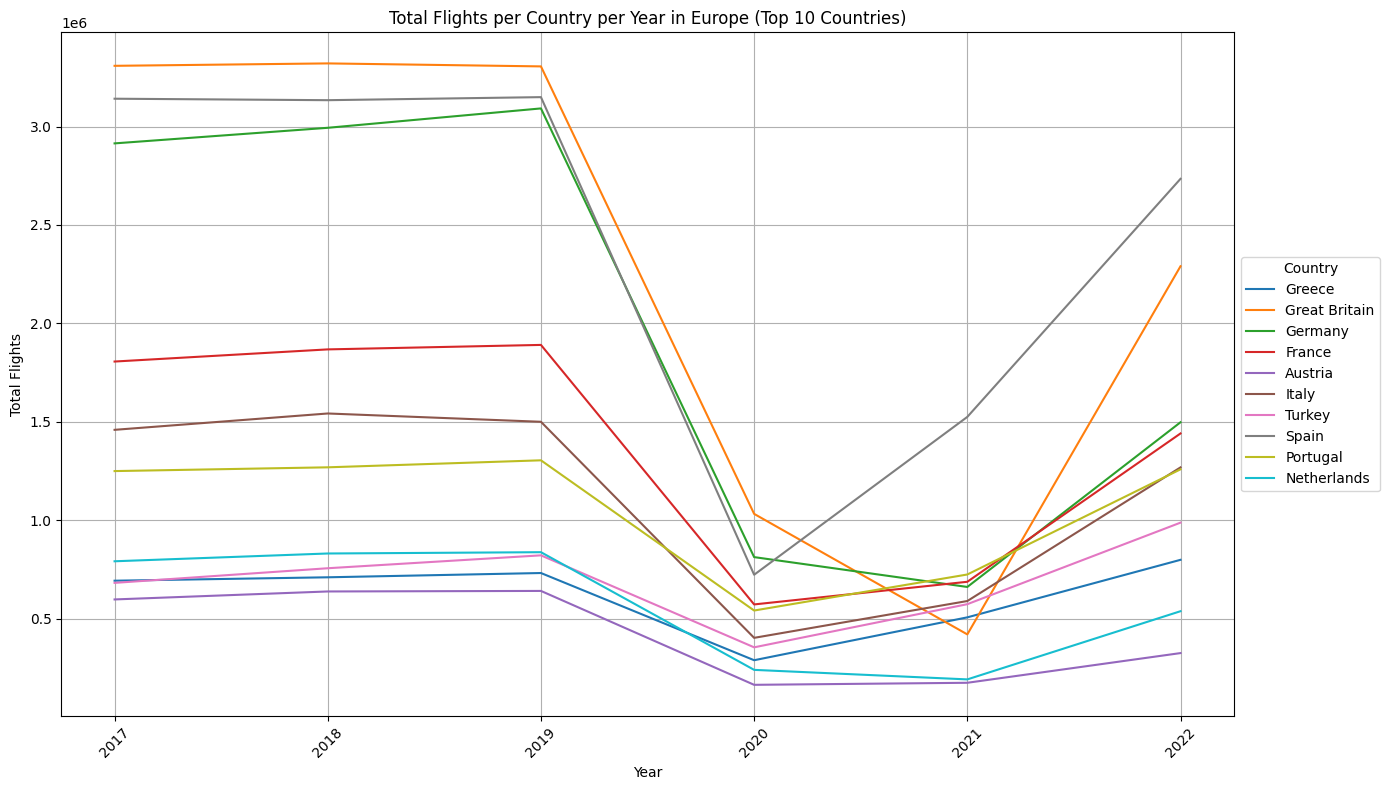

In [ ]:
import matplotlib.pyplot as plt

# Filter the combined DataFrame to only include countries in Europe
flights_df_europe = flights_df[(flights_df['continent'] == 'Europa / Europe') &
                               (flights_df['country'] != 'Total') &
                               (flights_df['country'] != 'Europa / Europe')]

# Calculate the total flights for each country
total_flights_per_country = flights_df_europe.groupby('country')['total'].sum().reset_index()

# Get the top 10 countries by total flights
top_10_countries = total_flights_per_country.nlargest(10, 'total')['country']

# Filter the DataFrame to include only the top 10 countries
flights_df_europe_top_10 = flights_df_europe[flights_df_europe['country'].isin(top_10_countries)]

# Sort the combined DataFrame by the 'year' column
flights_df_europe_top_10 = flights_df_europe_top_10.sort_values(by='year')

# Plot the data
plt.figure(figsize=(14, 8))

# Plot each country
for country in flights_df_europe_top_10['country'].unique():
    country_data = flights_df_europe_top_10[flights_df_europe_top_10['country'] == country]
    plt.plot(country_data['year'], country_data['total'], label=country)

plt.xlabel('Year')
plt.ylabel('Total Flights')
plt.title('Total Flights per Country per Year in Europe (Top 10 Countries)')
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
